# Module 8: Discovering The Discrete Fourier Transform

### Chris Tralie

### Due Friday 2/12


In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Rules

Assume $y1(t)$ and $y2(t)$ are pure cosines or pure sines that go through an integer number of periods on $[0, 1]$.

* If $y1(t) = y2(t)$, then $y1(t) . y2(t) > 0$
* Otherwise, $y1(t) . y2(t) = 0$


Corollary: It follows given the distributive law of dot products that

* If y1(t) is the sum of a bunch of pure cosines/sines
* And y2(t) is a pure cosine or sine

* If y2(t) is one of the pure sines/cosines in y1(t), then y1(t).y2(t) $\neq$ 0
* Otherwise, if y2(t) is not contained in y1(t), then y1(t).y2(t) = 0

In this module, you're going to explore sums of products of sinusoids and make some observations.  This will form the "basis" of Fourier analysis, the most important analytical tool we'll use in this course.  Please write up brief answers to the questions below as you experiment with code in a notebook, and then submit them as a document or comment on canvas.

The code below sets up two waveforms and and plots each one, as well as the element-wise product of the two.  It also reports the sum of all of the samples of the element-wise product as the title of the third plot.  This sum of element-wise products is referred to as a <b>dot product</b>, and it is the central operation in the discrete Fourier transform.

In the given example, the original signals are cosines at 2hz and 3hz, respectively, and their dot product is an incredibly small number.  In fact, you can consider this number and any other number in this range to be <b>numerically zero</b>; all of the negative samples (in blue) pretty much completely cancel out the positive ones (in orange).

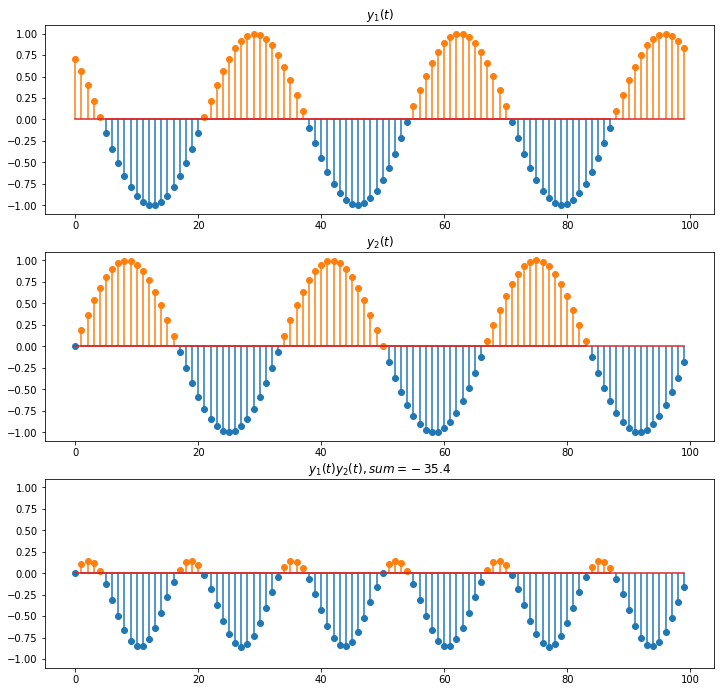

In [16]:
n_samples = 100
t = np.linspace(0, 1, n_samples+1)[0:n_samples]
# cos(A + B) = cos(A)cos(B) - sin(A)sin(B)
# cos(2pi*f*t + phi) = cos(phi)cos(2pi*f*t) - sin(phi)sin(2pi*f*t)
y1 = np.cos(2*np.pi*3*t + np.pi/4) 
y2 = np.sin(2*np.pi*3*t)
prod = y1*y2

r = max(np.max(np.abs(prod)), np.max(np.abs(y1)), np.max(np.abs(y2)))

t = np.arange(t.size)
plt.figure(figsize=(12, 16))
plt.subplot(411)
plt.stem(t[y1 > 0], y1[y1 > 0], 'C1', markerfmt='C1o')
plt.stem(t[y1 <= 0], y1[y1 <= 0], 'C0', markerfmt='C0o')
plt.ylim([-1.1*r, 1.1*r])
plt.title("$y_1(t)$")

plt.subplot(412)
plt.stem(t[y2 > 0], y2[y2 > 0], 'C1', markerfmt='C1o')
plt.stem(t[y2 <= 0], y2[y2 <= 0], 'C0', markerfmt='C0o')
plt.ylim([-1.1*r, 1.1*r])
plt.title("$y_2(t)$")

plt.subplot(413)
if np.sum(prod > 0) > 0:
    plt.stem(t[prod > 0], prod[prod > 0], 'C1', markerfmt='C1o')
if np.sum(prod <= 0) > 0:
    plt.stem(t[prod <= 0], prod[prod <= 0], 'C0', markerfmt='C0o')
plt.ylim([-1.1*r, 1.1*r])
plt.title("$y_1(t)y_2(t), sum = %.3g$"%np.sum(prod))

"""
plt.subplot(414)
cpluss = y1 + y2
plt.stem(t[cpluss > 0], cpluss[cpluss > 0], 'C1', markerfmt='C1o')
if np.sum(cpluss <= 0) > 0:
    plt.stem(t[cpluss <= 0], cpluss[cpluss <= 0], 'C0', markerfmt='C0o')
plt.title("$y_1(t) + y_2(t), sum = %.3g$"%np.sum(cpluss))
"""


plt.savefig("2_4_cosine.png")
plt.show()

In [7]:
#y1 = [1, 2]
#y2 = [-2, 1]

# Suppose y1 = a + b, a and b are arrays
# y1.y2 = y1.(a + b) = y1.a + y1.b

# Ex) y1 = sin(5hz) + cos(2hz)
#     y2 = sin(5hz)
#     y1.y2 = sin(5hz).sin(5hz) + cos(2hz).sin(5hz)
 
#y1, y2
dotprod = 0
for i in range(len(y1)):
    dotprod += y1[i]*y2[i]
print(dotprod)

-7.91033905045424e-16


### Exercise 1

You should modify the above code to try different signals.  In every example you look at, the signal will go through an integer number of periods.  Given this setup, examine the following combinations of $y_1(t)$ and $y_2(t)$ and their plots, and report which sums are numerically zero (the negatives cancel out the positives) and which ones are not:

1. $y_1(t)$ is a 2hz cosine and $y_2(t)$ is a 4hz cosine


2. $y_1(t)$ is a 2hz cosine and $y_2(t)$ is also a 2hz cosine


3. $y_1(t)$ is a 3hz cosine and $y_2(t)$ is also a 3hz cosine


4. $y_1(t)$ is a 3hz cosine and $y_2(t)$ is a 3hz sine


5. $y_1(t)$ is the sum of a 2hz cosine, a 3hz cosine, and a 4hz cosine, and $y_2(t)$ is a 3hz cosine


6. $y_1(t)$ is the sum of a 2hz cosine, a 3hz cosine, and a 4hz cosine, and $y_2(t)$ is a 1hz cosine


7. $y_1(t)$ is the sum of a 1hz cosine and a 5hz cosine, and $y_2(t)$ is a 1hz sine


8. $y_1(t)$ is the sum of a 1hz cosine and a 5hz cosine, and $y_2(t)$ is a 1hz cosine


9. $y_1(t)$ is the sum of a 1hz cosine and a 5hz cosine, and $y_2(t)$ is a 3hz cosine


10. $y_1(t)$ is a 2hz sinusoid with a phase of $\phi = \pi/4$, and $y_2(t)$ is a 2h cosine


11. $y_1(t)$ is a 2hz sinusoid with a phase of $\phi = \pi/4$, and $y_2(t)$ is a 2h sine


### Exercise 2:


Given your observations above, what patterns do you notice?  In particular, if you think of $y_1(t)$ as a signal and $y_2(t)$ as the "tester" or "probe" sinusoid, when do probes lead to a nonzero sum of products?


### Fun Fact

I learned this Discrete Fourier Transform back in 2005 for a <a href = "http://www.ctralie.com/PrincetonUGRAD/HighSchool/myprograms/AutoComposer/">science fair project</a> by doing these kinds of experiments in Microsoft Excel before I'd even taken calculus! (I was lucky to stumble across some random internet tutorial that meshed perfectly with my background knowledge in trig only).  But then in college I actually learned the math in detail.  So I'm going to take you through my journey in this course.